In [1]:
psrname='J2124-3358'

In [2]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNTA/'+psrname+'/results/'

In [3]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir/')
from diff_chain import  Diff_chain_shift

2023-03-31 03:12:13.599130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 03:12:13.645806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 03:12:13.646874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 03:12:14.384394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
par_epta_spnta=pd.read_csv(epta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lep=len(par_epta_spnta)
#par_epta_spnta

In [7]:
epta_spnta_1=np.loadtxt(epta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(lep-2,lep-1,-1))

In [10]:
par_einpta_spnta=pd.read_csv(einpta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
leinp=len(par_einpta_spnta)
#par_einpta_spnta

In [11]:
einpta_spnta_1=np.loadtxt(einpta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(leinp-2,leinp-1,-1))

In [12]:
epta_spnta_arr_dm=epta_spnta_1.T[0:2];einpta_spnta_arr_dm=einpta_spnta_1.T[0:2]

In [13]:
loglike_spnta_epta=epta_spnta_1.T[-1];loglike_spnta_einpta=einpta_spnta_1.T[-1]

# Tension considering dm noise only

In [14]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [15]:
epta_dm=MCSamples(samples=np.array(epta_spnta_arr_dm).transpose(),loglikes=loglike_spnta_epta,names=names_dm,labels=labels_dm,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_spnta_arr_dm).transpose(),loglikes=loglike_spnta_einpta,names = names_dm,labels=labels_dm,label='EPTA+INPTA \n'+psrname)

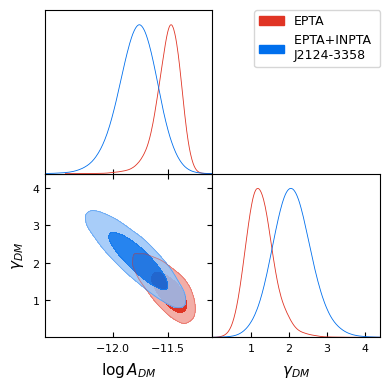

In [16]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_EPTAvsEINPTA_SPNTA_DM.png',dpi=300)
plt.show()

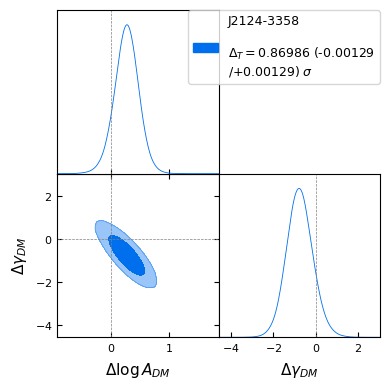

In [17]:
%matplotlib inline
diff_chain_dm, nsig_dm,sigl_dm,sigu_dm=Diff_chain_shift(epta_dm,einpta_dm)

g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.5f}".format(nsig_dm))+' (-'+str("{:.5f}".format(sigu_dm-nsig_dm))
                        +'\n/+'+str("{:.5f}".format(nsig_dm-sigl_dm))+') $\sigma$'],markers=[0,0,0,0])

plt.savefig(psrname+'diff_EPTAvsEINPTA_SPNTA_dm.png',dpi=300)